In [1]:
# load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [5]:
# read in files
happiness_index = pd.read_csv('../Data/happiness_index_2018.csv')
alcohol_consumption = pd.read_csv('../Data/alcohol_consumption.csv')

# merge csv files
df = pd.merge(happiness_index, alcohol_consumption, on='Country', how='outer')

# check the file has been read in
df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Indicator Name,Indicator Code,2000,2005,2010,2015,2018
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,11.69,13.11,12.59,11.18,10.78
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.95,8.87,8.94,7.52,7.41
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.67,12.29,11.00,10.36,10.26
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.03,7.74,7.50,8.74,9.12
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.49,11.64,11.41,11.58,11.53


In [6]:
# clean dataframe with only the relevant data
df = df[['Country', 'Country Code', 'Score', 'GDP per capita', 'Indicator Name','2018']]

# check dataframe for any errors
df = df.dropna()

df

,Country,Country Code,Score,GDP per capita,Indicator Name,2018
0,Finland,FIN,7.632,1.305,Total alcohol consumption per capita (liters o...,10.78
1,Norway,NOR,7.594,1.456,Total alcohol consumption per capita (liters o...,7.41
2,Denmark,DNK,7.555,1.351,Total alcohol consumption per capita (liters o...,10.26
3,Iceland,ISL,7.495,1.343,Total alcohol consumption per capita (liters o...,9.12
4,Switzerland,CHE,7.487,1.420,Total alcohol consumption per capita (liters o...,11.53
...,...,...,...,...,...,...
148,Liberia,LBR,3.495,0.076,Total alcohol consumption per capita (liters o...,6.12
150,Rwanda,RWA,3.408,0.332,Total alcohol consumption per capita (liters o...,8.95
152,Tanzania,TZA,3.303,0.455,Total alcohol consumption per capita (liters o...,11.27
154,Central African Republic,CAF,3.083,0.024,Total alcohol consumption per capita (liters o...,2.38


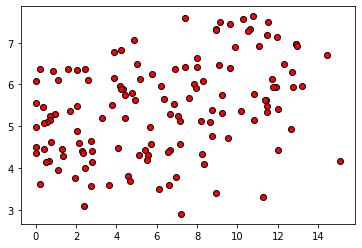

<Figure size 432x288 with 0 Axes>

In [7]:
alcohol_c = df["2018"]
score = df['Score']

# create and format plot
plt.scatter(alcohol_c, score, marker="o", facecolors="red", edgecolors="black")

# show plot
plt.show()
plt.tight_layout()


In [8]:
corr = st.pearsonr(alcohol_c,score)

corr

(0.3735746852735518, 8.087619218763933e-06)